In [77]:
import pyaspic
import numpy as np
import matplotlib.pyplot as plt
Pstar = 2.2030e-09 #powerAmpScalar #As
lnRhoNuc = -187.77
bfoldstar = 0.0

# Constants to calculate ns, nt, alphas, alphat and r (from Ænclyclopedia Inflationaris)
C = -0.7296
f = 5
g = 7

In [79]:
p = 0
npts = 20

#lists
wl = []
nsl = []
rl = []
eps1l = []
eps2l = []
eps3l = []

while (p<13):
    p = p+1
    w = (p-2)/(p+2)
    wl.append(w)

    lnRhoRehMin = lnRhoNuc
    lnRhoRehMax = pyaspic.lfi_lnrhoreh_max(p,Pstar)
    lnrhorehl = []
    #print('w = ',w)
    
    for i in range(1,npts):
        lnRhoReh = lnRhoRehMin + (lnRhoRehMax-lnRhoRehMin)*(i-1)/(npts-1)
        xstar, bfoldstar = pyaspic.lfi_x_star(p,w,lnRhoReh,Pstar,bfoldstar)
        #print('lnRhoReh = ',lnRhoReh)
        
        eps1 = pyaspic.lfi_epsilon_one(xstar,p)
        eps2 = pyaspic.lfi_epsilon_two(xstar,p)
        eps3 = pyaspic.lfi_epsilon_three(xstar,p)
        
        a0s = 1 -2*(C+1)*eps1 -C*eps2 +(2*C**2+2*C+np.pi**2/2-f)*eps1**2 +(C**2-C+7*np.pi**2/12-g)*eps1*eps2 +(1/2*C**2+np.pi**2/8-1)*eps2**2 +(-1/2*C**2+np.pi**2/24)*eps2*eps3
        a1s = -2*eps1-eps2+2*(2*C+1)*eps1**2+(2*C-1)*eps1*eps2+C*eps2**2-C*eps2*eps3
        a2s = 4*eps1**2+2*eps1*eps2+eps2**2-eps2*eps3
        
        a0t = 1-2*(C+1)*eps1 +(2*C**2+2*C+np.pi**2/2-f)*eps1**2+(-C**2-2*C+np.pi**2/12-2)*eps1*eps2
        a1t = -2*eps1+2*(2*C+1)*eps1**2-2*(C+1)*eps1*eps2
        a2t = 4*eps1**2-2*eps1*eps2
        
        ns = 1+a1s/a0s
        r = 16*eps1*a1t/a0s
        
        lnrhorehl.append(lnRhoReh)
        nsl.append(ns)
        rl.append(r)
        eps1l.append(eps1)
        eps2l.append(eps2)
        eps3l.append(eps3)

In [80]:
lnrhorehl = np.array(lnrhorehl)
wl = np.array(wl)
nsl = (np.array(nsl).reshape((len(wl),len(lnrhorehl)))).T
rl = (np.array(rl).reshape((len(wl),len(lnrhorehl)))).T
eps1l = (np.array(eps1l).reshape((len(wl),len(lnrhorehl)))).T
eps2l = (np.array(eps2l).reshape((len(wl),len(lnrhorehl)))).T
eps3l = (np.array(eps3l).reshape((len(wl),len(lnrhorehl)))).T

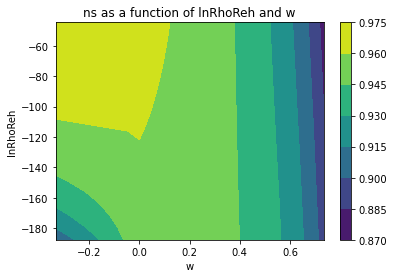

In [81]:
#ns

nsplot = plt.contourf(wl,lnrhorehl, nsl)
plt.colorbar(nsplot)
plt.title('ns as a function of lnRhoReh and w')
plt.xlabel('w') 
plt.ylabel('lnRhoReh') 
plt.show() 

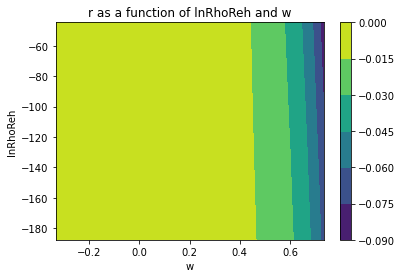

In [82]:
#r

rplot = plt.contourf(wl,lnrhorehl, rl)
plt.colorbar(rplot)
plt.title('r as a function of lnRhoReh and w')
plt.xlabel('w') 
plt.ylabel('lnRhoReh') 
plt.show() 

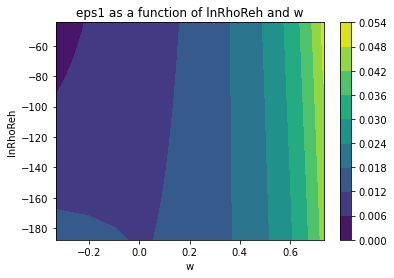

In [83]:
#eps1

eps1plot = plt.contourf(wl,lnrhorehl, eps1l)
plt.colorbar(eps1plot)
plt.title('eps1 as a function of lnRhoReh and w')
plt.xlabel('w') 
plt.ylabel('lnRhoReh') 
plt.show() 

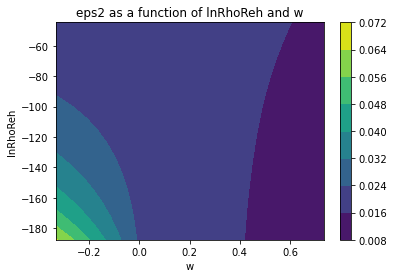

In [84]:
#eps2

eps2plot = plt.contourf(wl,lnrhorehl, eps2l)
plt.colorbar(eps2plot)
plt.title('eps2 as a function of lnRhoReh and w')
plt.xlabel('w') 
plt.ylabel('lnRhoReh') 
plt.show() 

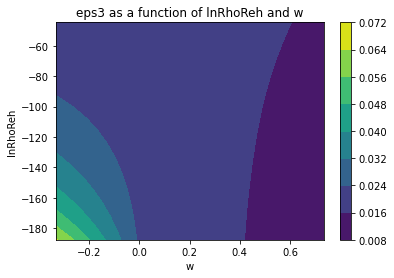

In [85]:
#eps3

eps3plot = plt.contourf(wl,lnrhorehl, eps3l)
plt.colorbar(eps3plot)
plt.title('eps3 as a function of lnRhoReh and w')
plt.xlabel('w') 
plt.ylabel('lnRhoReh') 
plt.show() 

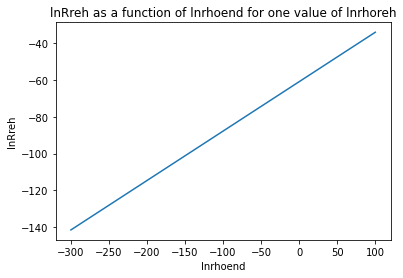

In [88]:
#lnRreh
#choose 1 lnRhoReh

lnrhoend = np.linspace(-300,100,200)
Mpl = 2.4353e27 #eV

wmean = np.mean(wl)
lnRreh = (1-3*wmean)/(12*(1+wmean))*(lnrhorehl[9]-lnrhoend)+1/4*(lnrhoend-np.log(Mpl**4))
plt.plot(lnrhoend,lnRreh)
plt.title('lnRreh as a function of lnrhoend for one value of lnrhoreh')
plt.xlabel('lnrhoend')
plt.ylabel('lnRreh')
plt.show()

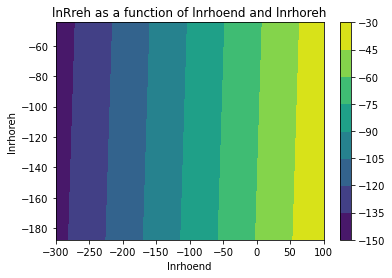

In [90]:
#contourplot of lnrhoend and lnrhoreh

lnrhoend = np.linspace(-300,100,200)
Mpl = 2.4353e27 #eV

wmean = np.mean(wl)
[X,Y] = np.meshgrid(lnrhoend, lnrhorehl)
lnRrehc = (1-3*wmean)/(12*(1+wmean))*(Y-X)+1/4*(X-np.log(Mpl**4))
lnRrehplot = plt.contourf(lnrhoend,lnrhorehl, lnRrehc)
plt.colorbar(lnRrehplot)
plt.title('lnRreh as a function of lnrhoend and lnrhoreh')
plt.xlabel('lnrhoend')
plt.ylabel('lnrhoreh')
plt.show()